In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [10]:
df = pd.read_csv("customer_churn_data.csv")

In [11]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [12]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [14]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [15]:
df['InternetService'] = df['InternetService'].fillna("")

In [16]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [19]:
numeric_columns_data = df.select_dtypes(include=['number'])

In [20]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


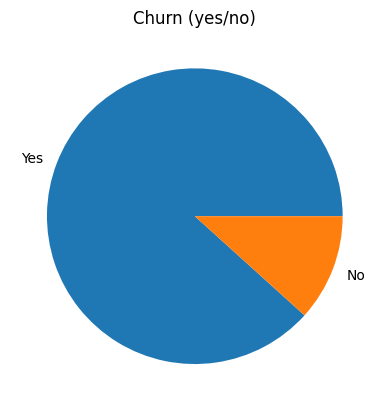

In [21]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn (yes/no)")
plt.ylabel("")
plt.show()

In [22]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [23]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [24]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [25]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [26]:
df.groupby('ContractType')['MonthlyCharges'].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

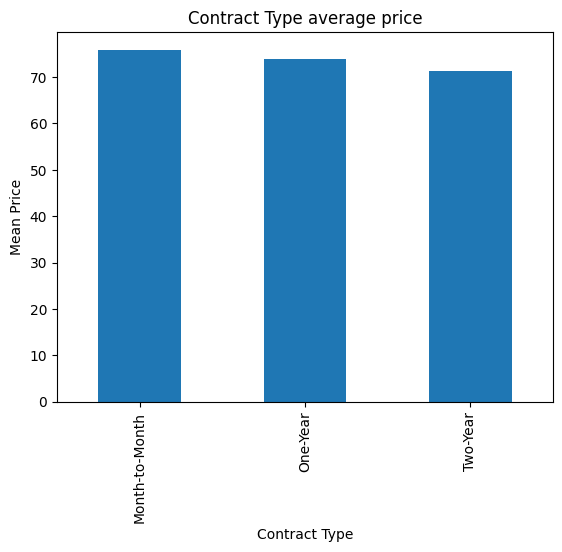

In [27]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.ylabel('Mean Price')
plt.xlabel('Contract Type')
plt.title('Contract Type average price')
plt.show()

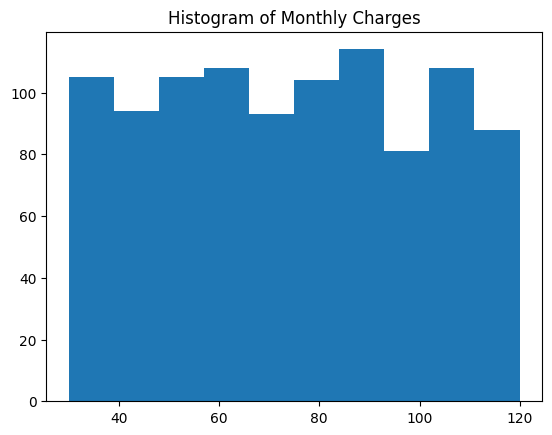

In [28]:
plt.hist(df['MonthlyCharges'])
plt.title('Histogram of Monthly Charges')
plt.show()

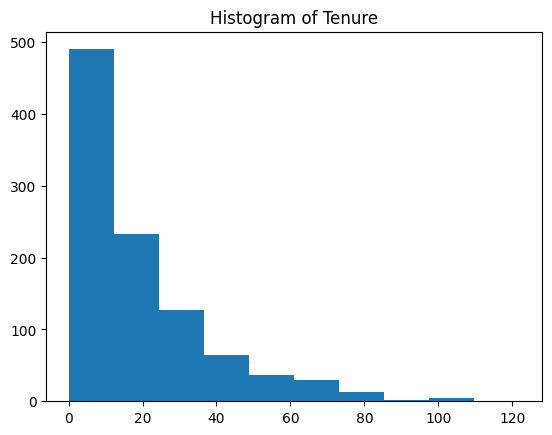

In [29]:
plt.hist(df['Tenure'])
plt.title('Histogram of Tenure')
plt.show()

In [30]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [31]:
X = df[['Gender','Age','Tenure','MonthlyCharges']]
y = df['Churn']

In [32]:
X

,Gender,Age,Tenure,MonthlyCharges
0,Male,49,4,88.35
1,Male,43,0,36.67
2,Female,51,2,63.79
3,Female,60,8,102.34
4,Male,42,32,69.01
...,...,...,...,...
995,Male,42,41,37.14
996,Male,62,9,80.93
997,Female,51,15,111.72
998,Male,39,68,65.67


In [33]:
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 

In [34]:
y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [35]:
X.head()

,Gender,Age,Tenure,MonthlyCharges
0,0,49,4,88.35
1,0,43,0,36.67
2,1,51,2,63.79
3,1,60,8,102.34
4,0,42,32,69.01


In [36]:
type(X['Gender'][0])



numpy.int64

In [37]:
y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [38]:
y = y.apply(lambda x: 1 if x== 'Yes' else 0)

In [39]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [43]:
X_train = sc.fit_transform(X_train)

In [44]:
import joblib
joblib.dump(sc,'sc.pkl')

['sc.pkl']

In [45]:
X_test  = sc.fit_transform(X_test)

In [46]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,prediction)))

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
lr.fit(X_train , y_train)

LogisticRegression()

In [55]:
y_pred = lr.predict(X_test)

In [58]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
param_grid = {
    'n_neighbors':[3,5,7,9],
    'weights' : ['uniform','distance'],

}

In [61]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [67]:
gridkn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [68]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [69]:
y_predict = gridkn.predict(X_test)

In [70]:
modelperformance(y_predict)

Accuracy score on model is 0.88


In [71]:
from sklearn.svm import SVC 

In [72]:
svm = SVC()

In [73]:
param_grid = {
    'C':[0.01,0.1,-.5,1],
    'kernel':['linear','rbf','poly'],
}

In [74]:
gridsvc = GridSearchCV(svm,param_grid,cv=5)

In [75]:
gridsvc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, -0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [76]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [78]:
pred = gridsvc.predict(X_test)

In [79]:
modelperformance(pred)

Accuracy score on model is 0.885


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

In [82]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [84]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [86]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [87]:
prediction = grid_tree.predict(X_test)

In [88]:
modelperformance(prediction)

Accuracy score on model is 0.835


In [89]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [90]:
param_grid = {
    'n_estimators':[32,64,128,256],
    'max_features':[2,3,4],
    'bootstrap':[True,False]

}

In [102]:
grid_rfc = GridSearchCV(rc,param_grid,cv=50)

In [103]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=50, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [104]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [105]:
rfc_pred = grid_rfc.predict(X_test)

In [106]:
modelperformance(rfc_pred)

Accuracy score on model is 0.85


In [108]:
best_model = gridsvc.best_estimator_

In [109]:
joblib.dump(best_model,'model.pkl')

['model.pkl']

In [110]:
X.columns

Index(['Gender', 'Age', 'Tenure', 'MonthlyCharges'], dtype='object')